# Mini Project - IronKaggle

## Imports

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline


## Explore dataset

In [16]:
# load dataset
sales = pd.read_csv('sales.csv')
print(sales.info())
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB
None


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [17]:
# check for missing value
sales.isna().sum()

# no missing value

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [18]:
# We have two categorical data: date and state_holiday
print(sales.state_holiday.unique())

# let's convert state holiday to integer values
sales['state_holiday'] = sales['state_holiday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})
sales['state_holiday'] = pd.to_numeric(sales['state_holiday'], errors='coerce')
print(sales.state_holiday.unique())
print(sales.info())

['0' 'a' 'c' 'b']
[0 1 3 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  int64 
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 48.9+ MB
None


In [19]:
# sales['day_of_week'].unique()

In [20]:
# One hot encoding the day of the week so models can handle categorical features well when represented as binary (one-hot encoded) variables
# sales = pd.get_dummies(sales, columns=['day_of_week'], drop_first=False)


In [21]:
print(sales.info())
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  int64 
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 48.9+ MB
None


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [22]:
# Now lets split dates into three columns
sales['date'] = pd.to_datetime(sales['date'], errors='coerce')
sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day
sales.drop('date', axis=1, inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Unnamed: 0           640840 non-null  int64
 1   store_ID             640840 non-null  int64
 2   day_of_week          640840 non-null  int64
 3   nb_customers_on_day  640840 non-null  int64
 4   open                 640840 non-null  int64
 5   promotion            640840 non-null  int64
 6   state_holiday        640840 non-null  int64
 7   school_holiday       640840 non-null  int64
 8   sales                640840 non-null  int64
 9   year                 640840 non-null  int32
 10  month                640840 non-null  int32
 11  day                  640840 non-null  int32
dtypes: int32(3), int64(9)
memory usage: 51.3 MB


In [23]:
# Let's drop the unnamed column and the store id
sales.drop(columns=['Unnamed: 0', 'store_ID'], inplace=True)

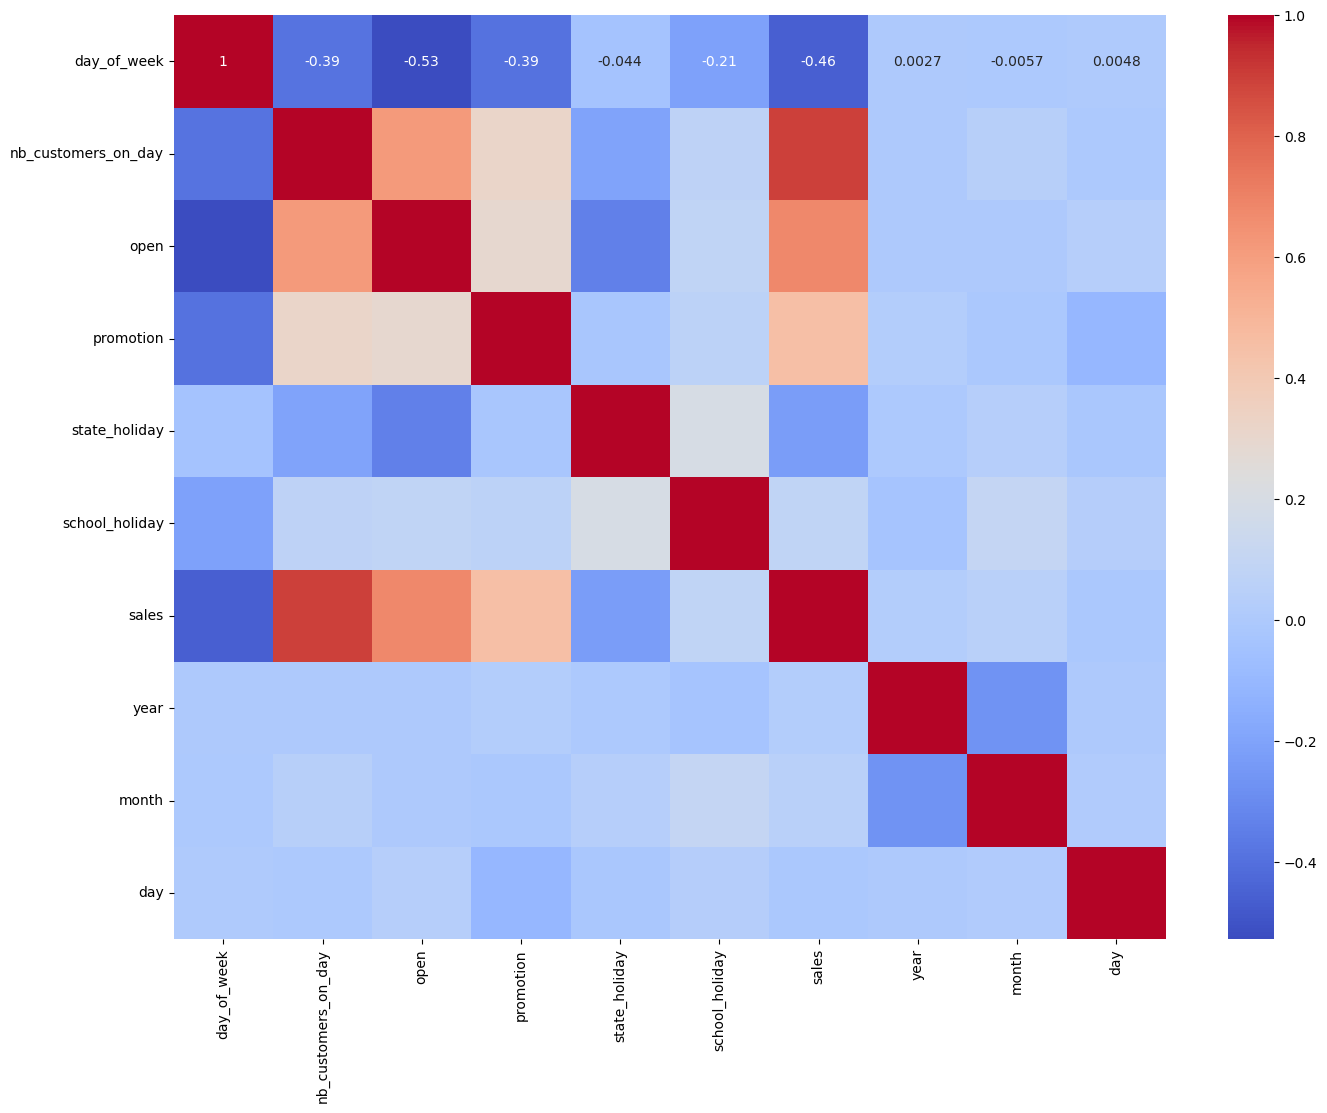

In [24]:
# Let's check the collinearity
def plot_correlation_matrix(data):
    corr_matrix = data.corr()

    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

plot_correlation_matrix(sales)

In [25]:
# Lets save our target and remove it from features
y = sales['sales']
X = sales.drop('sales', axis=1)

print(X.info())
print()
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   day_of_week          640840 non-null  int64
 1   nb_customers_on_day  640840 non-null  int64
 2   open                 640840 non-null  int64
 3   promotion            640840 non-null  int64
 4   state_holiday        640840 non-null  int64
 5   school_holiday       640840 non-null  int64
 6   year                 640840 non-null  int32
 7   month                640840 non-null  int32
 8   day                  640840 non-null  int32
dtypes: int32(3), int64(6)
memory usage: 36.7 MB
None

<class 'pandas.core.series.Series'>
RangeIndex: 640840 entries, 0 to 640839
Series name: sales
Non-Null Count   Dtype
--------------   -----
640840 non-null  int64
dtypes: int64(1)
memory usage: 4.9 MB
None


In [28]:
# Let's standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def apply_standard_scaler(df):
    
    numeric_columns = ['nb_customers_on_day', 'promotion', 'year', 'month', 'day', 'sales']
    df_stand = df.copy()
    df_stand[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df_stand

X_stand = apply_standard_scaler(sales)
X_stand.describe()


,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
count,640840.000000,6.408400e+05,640840.000000,6.408400e+05,640840.000000,640840.000000,6.408400e+05,6.408400e+05,6.408400e+05,6.408400e+05
mean,4.000189,1.242929e-17,0.830185,-5.328738e-17,0.045475,0.178472,1.332517e-16,-2.691539e-14,2.529099e-17,3.543622e-17
std,1.996478,1.000001e+00,0.375470,1.000001e+00,0.284826,0.382910,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,1.000000,-1.364806e+00,0.000000,-7.857380e-01,0.000000,0.000000,-1.500121e+00,-1.070777e+00,-1.457085e+00,-1.673461e+00
25%,2.000000,-4.921386e-01,1.000000,-7.857380e-01,0.000000,0.000000,-5.313661e-01,-1.070777e+00,-8.557980e-01,-8.772080e-01
50%,4.000000,-5.257248e-02,1.000000,-7.857380e-01,0.000000,0.000000,-8.170936e-03,2.156714e-01,4.613238e-02,3.279546e-02
75%,6.000000,4.408620e-01,1.000000,1.272689e+00,0.000000,0.000000,5.407296e-01,2.156714e-01,6.474193e-01,8.290485e-01
max,7.000000,1.039574e+01,1.000000,1.272689e+00,3.000000,1.000000,9.288605e+00,1.502119e+00,1.849993e+00,1.739052e+00


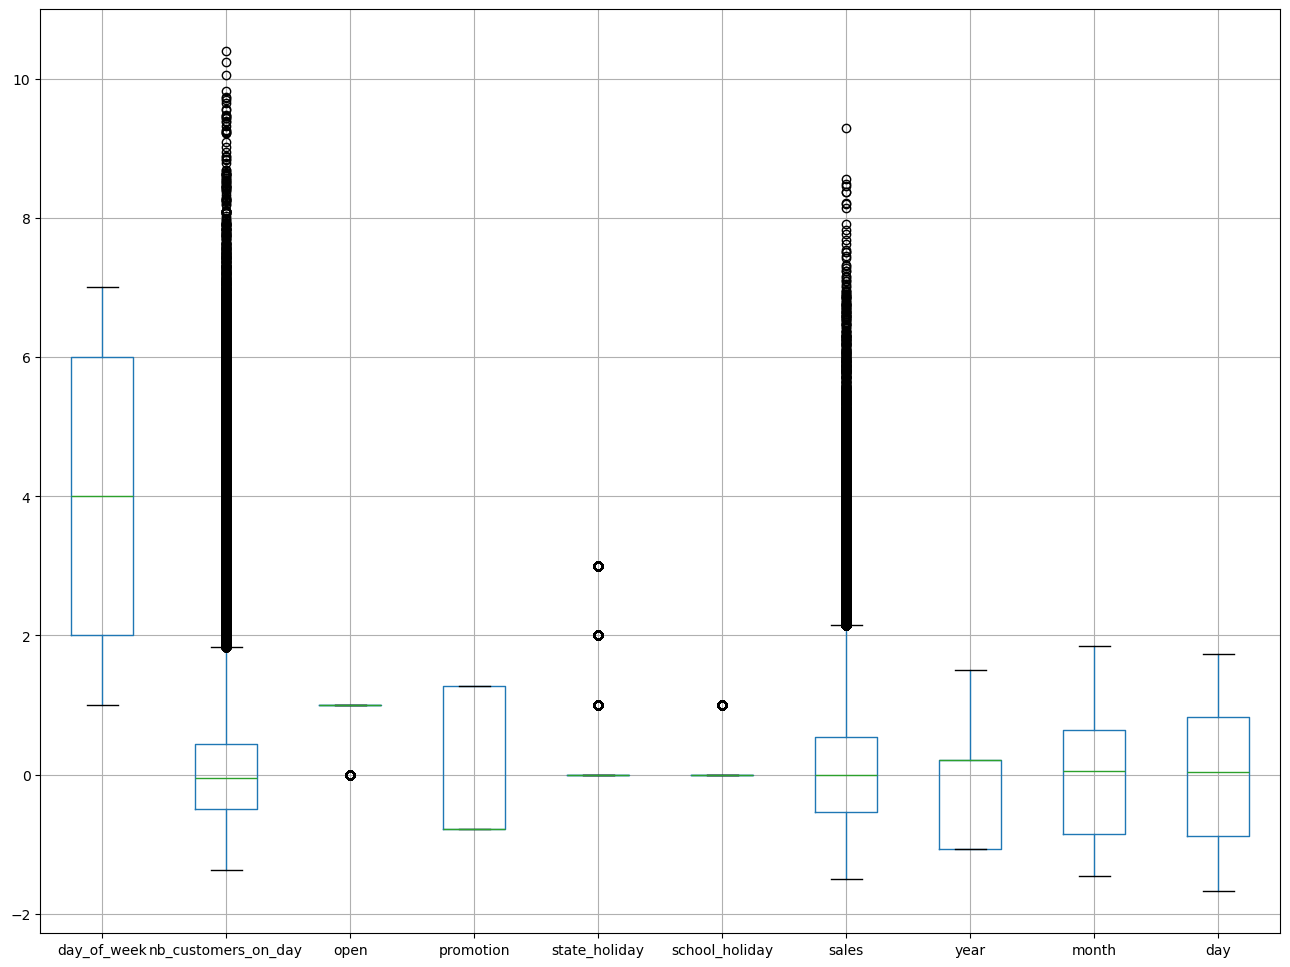

In [29]:
def plot_boxplot(data):
    data.boxplot(figsize=(16, 12))
    plt.show()

plot_boxplot(X_stand)


## Split Dataset

In [344]:
# lets split the dataset and create our sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(512672, 15) (128168, 15)
(512672,) (128168,)


## Model 1: Linear Regression

In [345]:
# Initisalise and train linear regression model
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [346]:
# Check metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_reg.predict(X_test)
linear_reg_r2 = r2_score(y_test, y_pred)
linear_reg_mse = mean_squared_error(y_test, y_pred)

print(f'Model1 r2_score: {linear_reg_r2}')
print(f'Model1 mse: {linear_reg_mse}')


Model1 r2_score: 0.8553805187466126
Model1 mse: 2137716.19296338


## Model 2: Random Forrest Regressor

In [290]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [292]:
y_pred = random_forest.predict(X_test)
random_forest_r2 = r2_score(y_test, y_pred)
random_forest_mse = mean_squared_error(y_test, y_pred)

print(f'Model2 r2_score: {random_forest_r2}')
print(f'Model2 mse: {random_forest_mse}')

Model2 r2_score: 0.86
Model2 mse: 2109035.69


## Model 3: XBoost Regressor

In [294]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(
    objective='reg:squarederror',  # Define the objective function for regression
    n_estimators=100,              # Number of trees
    learning_rate=0.1,             # Step size shrinkage
    max_depth=5,                   # Maximum depth of a tree
    subsample=0.8,                 # Subsample ratio of the training instances
    colsample_bytree=0.8,          # Subsample ratio of columns when constructing each tree
    random_state=42                # For reproducibility
)

xgboost.fit(X_train, y_train)

# Predict on the test data
y_pred = xgboost.predict(X_test)

# Calculate Mean Squared Error (MSE)
xboost_r2 = r2_score(y_test, y_pred)
xboost_mse = mean_squared_error(y_test, y_pred)

print(f"XGBoost r2 Score: {xboost_r2}")
print(f"XGBoost mse: {xboost_mse}")

XGBoost r2 Score: 0.88
XGBoost mse: 1720184.58


## Improving Dataset: Removing outliers


In [351]:
from scipy import stats

# calculate zscore and filter dataset
def calculate_zscores_max(data):
    data = data.astype({col: 'int' for col in data.select_dtypes('bool').columns})
    z_scores = np.abs(stats.zscore(data))
    print(z_scores.max())

calculate_zscores_max(sales)


nb_customers_on_day    10.395741
open                    2.211057
promotion               1.272689
state_holiday          10.373080
school_holiday          2.145488
sales                   9.288605
day_of_week_1           2.458545
day_of_week_2           2.447347
day_of_week_3           2.447892
day_of_week_4           2.442903
day_of_week_5           2.440332
day_of_week_6           2.452641
day_of_week_7           2.456908
year                    1.502119
month                   1.849993
day                     1.739052
dtype: float64


nb_customers_on_day     2.707178
open                    2.168144
promotion               1.286562
state_holiday          10.254553
school_holiday          2.152853
sales                   8.018080
day_of_week_1           2.484978
day_of_week_2           2.454873
day_of_week_3           2.446640
day_of_week_4           2.443382
day_of_week_5           2.442933
day_of_week_6           2.449586
day_of_week_7           2.425010
year                    1.499505
month                   1.857814
day                     1.740099
dtype: float64
None


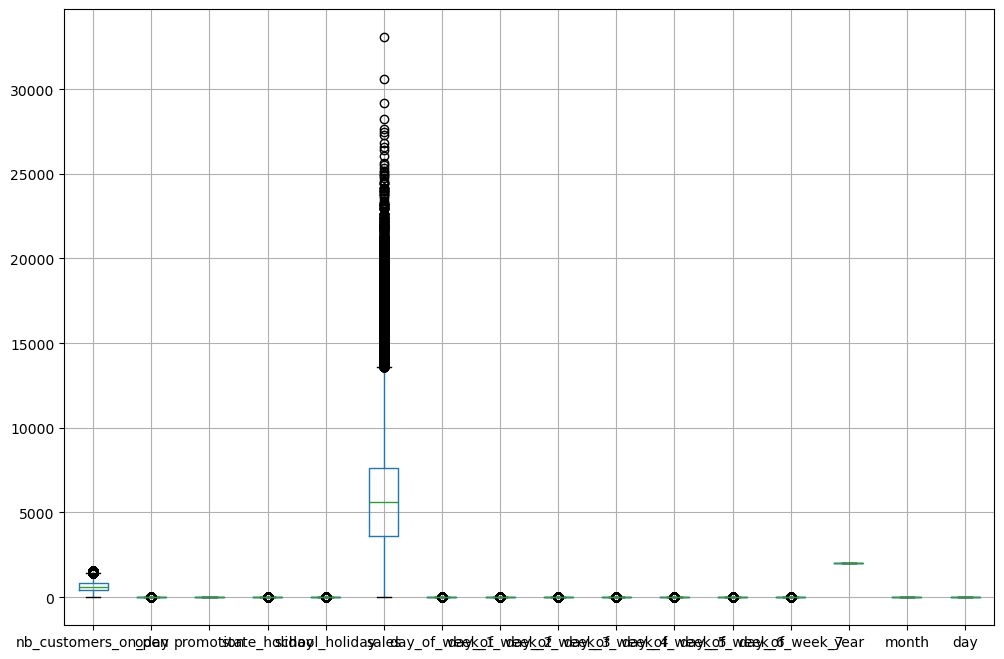

(640840, 16)
(620389, 16)


In [353]:
# Let's remove outlisers on nb_customers_on_day only
z_scores_customers = np.abs(stats.zscore(sales['nb_customers_on_day']))

sales_no_outliers = sales[z_scores_customers < 2]

print(calculate_zscores_max(sales_no_outliers))
plot_boxplot(sales_no_outliers)

print(sales.shape)
print(sales_no_outliers.shape)


In [356]:
# split X and y and apply standard scaler to X
y = sales_no_outliers['sales']
X = sales_no_outliers.drop('sales', axis=1)

print(X.shape, y.shape)

X_stand = apply_standard_scaler(X)
X_stand.describe()


(620389, 15) (620389,)


,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day
count,6.203890e+05,620389.000000,6.203890e+05,620389.000000,620389.000000,6.203890e+05,6.203890e+05,6.203890e+05
mean,1.186464e-16,0.824587,-4.963809e-17,0.046519,0.177469,-8.538809e-14,-2.638813e-17,-9.655031e-18
std,1.000001e+00,0.380320,1.000001e+00,0.288017,0.382066,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.613438e+00,0.000000,-7.772656e-01,0.000000,0.000000,-1.071378e+00,-1.454768e+00,-1.676226e+00
25%,-5.201370e-01,1.000000,-7.772656e-01,0.000000,0.000000,-1.071378e+00,-8.524802e-01,-8.790833e-01
50%,4.173688e-02,1.000000,-7.772656e-01,0.000000,0.000000,2.140638e-01,5.095119e-02,3.193656e-02
75%,6.285214e-01,1.000000,1.286562e+00,0.000000,0.000000,2.140638e-01,6.532388e-01,8.290789e-01
max,2.707178e+00,1.000000,1.286562e+00,3.000000,1.000000,1.499505e+00,1.857814e+00,1.740099e+00


In [359]:
# Rerun models
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, random_state=42)

# LinearRegression
print("LinearRegression")
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
linear_reg_r2 = r2_score(y_test, y_pred)
linear_reg_mse = mean_squared_error(y_test, y_pred)
print(f'Model1 r2_score: {linear_reg_r2}')
print(f'Model1 mse: {linear_reg_mse}')
print()

# RandomForrest
print("RandomForestRegressor")
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest_r2 = r2_score(y_test, y_pred)
random_forest_mse = mean_squared_error(y_test, y_pred)
print(f'Model2 r2_score: {random_forest_r2}')
print(f'Model2 mse: {random_forest_mse}')
print()

# XBoost
print('XGBoost')
xgboost = xgb.XGBRegressor(
    objective='reg:squarederror',  # Define the objective function for regression
    n_estimators=100,              # Number of trees
    learning_rate=0.1,             # Step size shrinkage
    max_depth=5,                   # Maximum depth of a tree
    subsample=0.8,                 # Subsample ratio of the training instances
    colsample_bytree=0.8,          # Subsample ratio of columns when constructing each tree
    random_state=42                # For reproducibility
)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
xboost_r2 = r2_score(y_test, y_pred)
xboost_mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost r2 Score: {xboost_r2}")
print(f"XGBoost mse: {xboost_mse}")

LinearRegression
Model1 r2_score: 0.8612669078358142
Model1 mse: 1641005.7573645476

RandomForestRegressor
Model2 r2_score: 0.8484842268795821
Model2 mse: 1792205.8259026723

XGBoost
XGBoost r2 Score: 0.8795776242507549
XGBoost mse: 1424417.2665463185
